# Section 1:  Fourier-space data processing for quantifying image-space phase gradient
* 2018 11 28 for julia 1.0

In [2]:
# push!(LOAD_PATH,"library");
using PyPlot
using FFTW
using GZip
# using NK_tools
# using Read_NIfTI1_real

### Loading magnitude and phase images with mathematically added noise

In [3]:
function load_nii_header(filename::String)    
    headerinfo = Dict()
    fid = open(filename,"r")
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["sizeof_hdr"] = testvalue
    testvalue = zeros(UInt8,10);
    read!(fid,testvalue);
    headerinfo["data_type"] = testvalue
    testvalue = zeros(Int8,18);
    read!(fid,testvalue);
    headerinfo["db_name"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["extents"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["session_error"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["regular"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["dim_info"] = testvalue
    testvalue = zeros(Int16,8);
    read!(fid,testvalue);
    headerinfo["dim"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p1"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p2"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p3"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["intent_code"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["datatype"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["bitpix"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["slice_start"] = testvalue
    testvalue = zeros(Float32,8);
    read!(fid,testvalue);
    headerinfo["pixdim"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["vox_offset"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["scl_slope"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["scl_inter"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["slice_end"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["slice_code"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["xyzt_units"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["cal_max"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["cal_min"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["slice_duration"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["toffset"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["glmax"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["glmin"] = testvalue
    testvalue = zeros(Int8,80);
    read!(fid,testvalue);
    headerinfo["descrip"] = testvalue
    testvalue = zeros(Int8,24);
    read!(fid,testvalue);
    headerinfo["aux_file"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["qform_code"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["sform_code"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_b"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_c"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_d"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_x"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_y"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_z"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_x"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_y"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_z"] = testvalue
    testvalue = zeros(Int8,16);
    read!(fid,testvalue);
    headerinfo["intent_name"] = testvalue
    testvalue = zeros(Int8,4);
    read!(fid,testvalue);
    headerinfo["magic"] = testvalue
    close(fid)
    headerinfo["qfac"] = headerinfo["pixdim"][1];
    headerinfo["filename"]= filename;
    return headerinfo;
end

load_nii_header (generic function with 1 method)

In [4]:
function load_niigz_header(filename::String)    
    headerinfo = Dict()
    fid = GZip.open(filename,"r")
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["sizeof_hdr"] = testvalue
    testvalue = zeros(UInt8,10);
    read!(fid,testvalue);
    headerinfo["data_type"] = testvalue
    testvalue = zeros(Int8,18);
    read!(fid,testvalue);
    headerinfo["db_name"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["extents"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["session_error"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["regular"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["dim_info"] = testvalue
    testvalue = zeros(Int16,8);
    read!(fid,testvalue);
    headerinfo["dim"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p1"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p2"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["intent_p3"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["intent_code"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["datatype"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["bitpix"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["slice_start"] = testvalue
    testvalue = zeros(Float32,8);
    read!(fid,testvalue);
    headerinfo["pixdim"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["vox_offset"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["scl_slope"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["scl_inter"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["slice_end"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["slice_code"] = testvalue
    testvalue = zeros(Int8,1);
    read!(fid,testvalue);
    headerinfo["xyzt_units"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["cal_max"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["cal_min"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["slice_duration"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["toffset"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["glmax"] = testvalue
    testvalue = zeros(Int32,1);
    read!(fid,testvalue);
    headerinfo["glmin"] = testvalue
    testvalue = zeros(Int8,80);
    read!(fid,testvalue);
    headerinfo["descrip"] = testvalue
    testvalue = zeros(Int8,24);
    read!(fid,testvalue);
    headerinfo["aux_file"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["qform_code"] = testvalue
    testvalue = zeros(Int16,1);
    read!(fid,testvalue);
    headerinfo["sform_code"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_b"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_c"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["quatern_d"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_x"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_y"] = testvalue
    testvalue = zeros(Float32,1);
    read!(fid,testvalue);
    headerinfo["qoffset_z"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_x"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_y"] = testvalue
    testvalue = zeros(Float32,4);
    read!(fid,testvalue);
    headerinfo["srow_z"] = testvalue
    testvalue = zeros(Int8,16);
    read!(fid,testvalue);
    headerinfo["intent_name"] = testvalue
    testvalue = zeros(Int8,4);
    read!(fid,testvalue);
    headerinfo["magic"] = testvalue
    close(fid)
    headerinfo["qfac"] = headerinfo["pixdim"][1];
    headerinfo["filename"]= filename;
    return headerinfo;
end

load_niigz_header (generic function with 1 method)

In [5]:
function load_nii_data(filename::String, headerinfo)
    zdim::Int = headerinfo["dim"][4];
    ydim::Int = headerinfo["dim"][3];
    xdim::Int = headerinfo["dim"][2];
    tdim::Int = headerinfo["dim"][5];
    ndim::Int = headerinfo["dim"][1];
    offset::Int = convert(Int,headerinfo["vox_offset"][1]);
    fid = open(filename,"r")
    seek(fid,offset)
    if headerinfo["datatype"][1]  == 2 
        data = zeros(UInt8,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 4
        data = zeros(Int16,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 8 
        data = zeros(Int32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 16 
        data = zeros(Float32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 64 
        data = zeros(Float64,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 256 
        data = zeros(Int8,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 512 
        data = zeros(UInt16,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 768 
        data = zeros(UInt32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 1024 
        data = zeros(Int64,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 1280 
        data = zeros(UInt64,xdim*ydim*zdim*tdim)
    else
        data = [];
        println("-- nii data were not loaded properly --")
    end
    read!(fid,data);
    close(fid);
    if ndim == 4
        data = reshape(data,xdim,ydim,zdim,tdim);
    elseif ndim == 3
        data = reshape(data,xdim,ydim,zdim);
    end
    return data;
end

load_nii_data (generic function with 1 method)

In [6]:
function load_niigz_data(filename::String, headerinfo)
    zdim::Int = headerinfo["dim"][4];
    ydim::Int = headerinfo["dim"][3];
    xdim::Int = headerinfo["dim"][2];
    tdim::Int = headerinfo["dim"][5];
    ndim::Int = headerinfo["dim"][1];
    offset::Int = convert(Int,headerinfo["vox_offset"][1]);
    fid = GZip.open(filename,"r")
    seek(fid,offset)
    if headerinfo["datatype"][1]  == 2 
        data = zeros(UInt8,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 4
        data = zeros(Int16,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 8 
        data = zeros(Int32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 16 
        data = zeros(Float32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 64 
        data = zeros(Float64,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 256 
        data = zeros(Int8,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 512 
        data = zeros(UInt16,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 768 
        data = zeros(UInt32,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 1024 
        data = zeros(Int64,xdim*ydim*zdim*tdim)
    elseif headerinfo["datatype"][1]  == 1280 
        data = zeros(UInt64,xdim*ydim*zdim*tdim)
    else
        data = [];
        println("-- nii data were not loaded properly --")
    end
    read!(fid,data);
    close(fid);
    if ndim == 4
        data = reshape(data,xdim,ydim,zdim,tdim);
    elseif ndim == 3
        data = reshape(data,xdim,ydim,zdim);
    end
    return data;
end

load_niigz_data (generic function with 1 method)

In [7]:
function qft(inputdata)
    sz = size(inputdata)
    szarray = [i for i in sz]
    szl = length(szarray);
    if szl == 2
        outputdata = fftshift(fft(fftshift(inputdata)));
    end
    if szl >2
        outputdata = complex(inputdata)
        for cnt = 1:cumprod(szarray[3:end])[end]
            tmp1 = fftshift(fft(fftshift(inputdata[:,:,cnt])))
            outputdata[:,:,cnt]=tmp1;
        end
    end
    return outputdata
end

function qift(inputdata)
    sz = size(inputdata)
    szarray = [i for i in sz]
    szl = length(szarray);
    if szl == 2
        outputdata = ifftshift(ifft(ifftshift(inputdata)));
    end
    if szl >2
        outputdata = complex(inputdata)
        for cnt = 1:cumprod(szarray[3:end])[end]
            tmp1 = ifftshift(ifft(ifftshift(inputdata[:,:,cnt])))
            outputdata[:,:,cnt]=tmp1;
        end
    end
    return outputdata
end


qift (generic function with 1 method)

In [8]:
function imal(inputdata, displayHorizontalNumber, displayVerticalNumber)
    szl = ndims(inputdata)
    if (szl == 3) && (typeof(inputdata[1]) <: Real)
        sz1,sz2,sz3 = size(inputdata)
        if displayHorizontalNumber*displayVerticalNumber <= sz3
            inputdata2 = inputdata[:,:,1:displayHorizontalNumber*displayVerticalNumber]
        else   
            inputdata2 = zeros(typeof(inputdata[1]), sz1,sz2, displayHorizontalNumber*displayVerticalNumber)
            inputdata2[:,:,1:sz3] = inputdata
        end
        inputdata2 = reshape(inputdata2, (sz1,sz2*displayHorizontalNumber, displayVerticalNumber))
        showme = inputdata2[:,:,1]
        for count = 2:displayVerticalNumber
            showme = vcat(showme,inputdata2[:,:,count])
        end
        print(sizeof(showme))
        imshow(showme,cmap="gray",interpolation = "none")
    else
        error("Input data of imal function should be a 3D image of real values")

    end
end


imal (generic function with 1 method)

In [9]:
# filename = string("subjectID25/magnitude_SNR2.nii");
# fid = open(filename,"r")
# testvalue = zeros(Int32,1);
# read!(fid,testvalue);
# close(fid)
# display(testvalue)

In [10]:
newFileName = string("subjectID25/magnitude_SNR2.nii");
headerinfo1 = load_nii_header(newFileName);
data001 = load_nii_data(newFileName, headerinfo1); 
println(typeof(data001))
newFileName = string("subjectID25/phase_SNR2.nii");
headerinfo1 = load_nii_header(newFileName);
data002 = load_nii_data(newFileName, headerinfo1); 
imagedata_noise = data001 .* exp.(complex(0,1)*data002);


Array{Float32,3}


### Choosing a single slice for data processing and display

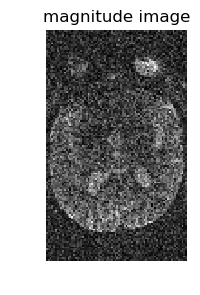

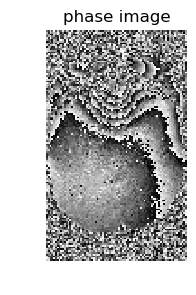

PyObject Text(0.5, 1.0, 'phase image')

In [11]:
ChooseThisSlice = 5; # process data for a single slice

imgsn = imagedata_noise[:,:,ChooseThisSlice];
ksn = qift(imgsn);
figure(1,figsize=(3,3));imshow(reverse(permutedims(abs.(imgsn),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("magnitude image")
figure(2,figsize=(3,3));imshow(reverse(permutedims(angle.(imgsn),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("phase image")

### Fourier-space data processing for computing image-phase phase gradient

In [12]:
function sidm(kdata::Array{Complex{Float32},2})
    kabs = abs.(kdata);
    pxpy = findall(kabs .== maximum(kabs));
    px = pxpy[1][1];
    py = pxpy[1][2];
    return (px,py);
end

sidm (generic function with 1 method)

In [14]:
datasize1,datasize2 = size(imgsn)
patchsizelist = Array(3:2:19);

pxmapALL = zeros(datasize1,datasize2,length(patchsizelist));
pymapALL = zeros(datasize1,datasize2,length(patchsizelist));

for countme = 1:length(patchsizelist)
    patchsize = patchsizelist[countme];
    pxmap = zeros(datasize1,datasize2);
    pymap = zeros(datasize1,datasize2);
    patchsize = div(patchsize + (1 + ((-1).^patchsize)),2);
    ps1 = max(div((patchsize-1),2),1);
    tmp1 = zeros(ComplexF32,(datasize1,datasize2))
    @time for cntx = 1:datasize1
        for cnty = 1:datasize2
            tmp1=tmp1*0.0f0;
            startingx = max(1,cntx-ps1);
            startingy = max(1,cnty-ps1);
            endingx = min(cntx+ps1,datasize1);
            endingy = min(cnty+ps1,datasize2);
            tmp1[startingx:endingx,startingy:endingy] = imgsn[startingx:endingx,startingy:endingy];
            tmp2 = qift(tmp1);
            px,py = sidm(tmp2);
            pxmap[cntx,cnty]=px;
            pymap[cntx,cnty]=py;
        end
    end
    pxmapALL[:,:,countme] = pxmap;
    pymapALL[:,:,countme] = pymap;
end

  4.106255 seconds (1.15 M allocations: 3.455 GiB, 9.03% gc time)
  3.458224 seconds (918.68 k allocations: 3.444 GiB, 9.94% gc time)
  3.308332 seconds (918.68 k allocations: 3.444 GiB, 9.78% gc time)
  3.384864 seconds (918.68 k allocations: 3.444 GiB, 10.02% gc time)
  3.495712 seconds (918.68 k allocations: 3.446 GiB, 8.92% gc time)
  3.469537 seconds (918.68 k allocations: 3.446 GiB, 9.32% gc time)
  3.430424 seconds (918.68 k allocations: 3.447 GiB, 9.16% gc time)
  3.186609 seconds (918.68 k allocations: 3.447 GiB, 9.40% gc time)
  3.627720 seconds (918.68 k allocations: 3.449 GiB, 8.80% gc time)


718848718848

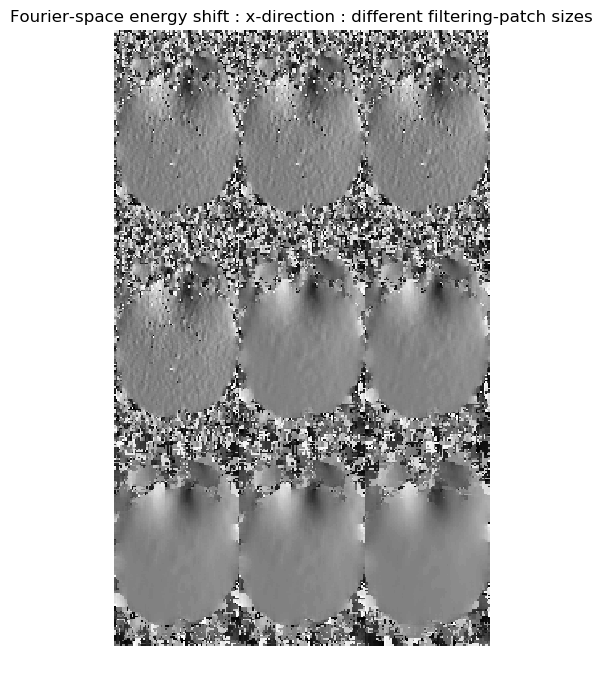

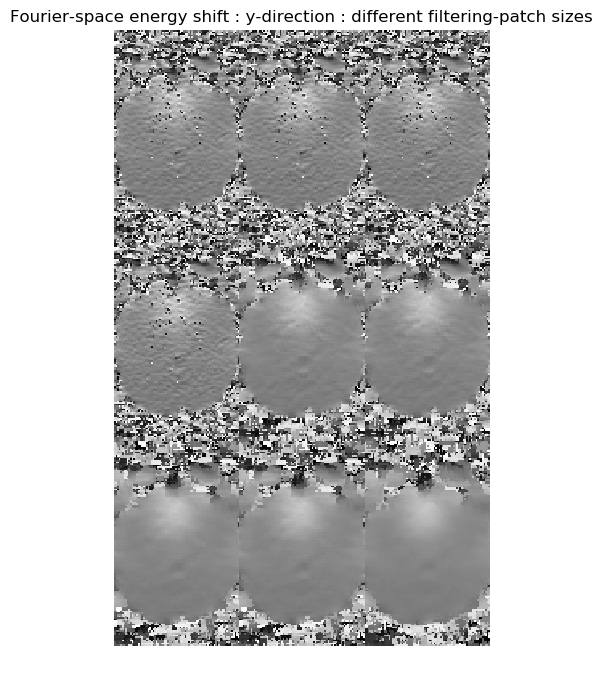

PyObject Text(0.5, 1.0, 'Fourier-space energy shift : y-direction : different filtering-patch sizes')

In [15]:
figure(1,figsize=(6,8)); imal(reverse(permutedims(pxmapALL,[2,1,3]),dims=1),3,3); axis("off"); title("Fourier-space energy shift : x-direction : different filtering-patch sizes")
figure(2,figsize=(6,8)); imal(reverse(permutedims(pymapALL,[2,1,3]),dims=1),3,3); axis("off"); title("Fourier-space energy shift : y-direction : different filtering-patch sizes")

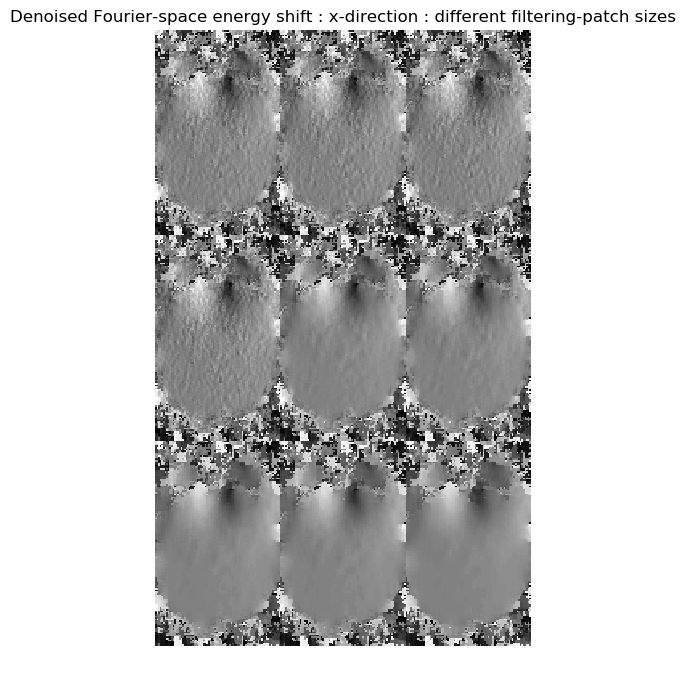

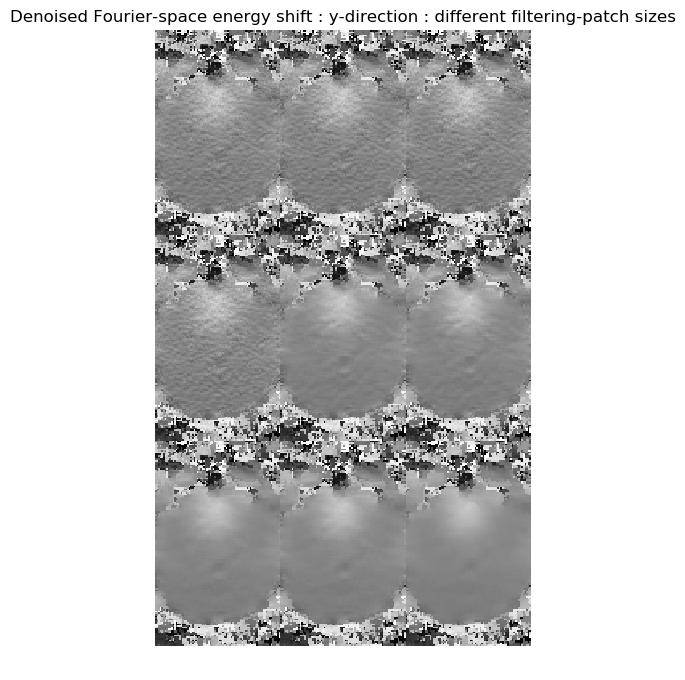

718848718848

PyObject Text(0.5, 1.0, 'Denoised Fourier-space energy shift : y-direction : different filtering-patch sizes')

In [16]:
function two_point_check(point1,point2,threshold)
    tmp1 = abs(point2-point1)
    threshold = abs(threshold)
    output = point2
    if tmp1>threshold
        output = point1
    end
    return output
end

function array_check(array1::Array{Float64,1},threshold)
    newData = copy(array1);
    len = length(array1)
    countme = 2
    while (countme <= len)
        newData[countme] = two_point_check(newData[countme-1],newData[countme],threshold)
        countme = countme + 1;
    end
    return newData
end

pxmap_checked = zeros(datasize1,datasize2,length(patchsizelist));
pymap_checked = zeros(datasize1,datasize2,length(patchsizelist));

for cntx = 1: datasize1
    for cnty = 1: datasize2
        threshold = 10;
        array01 = pxmapALL[cntx,cnty,:];
        array01 = array01[:];
        array01 = reverse(array01,dims=1);
        array02 = array_check(array01,threshold);
        pxmap_checked[cntx,cnty,:] = reverse(array02,dims=1);
    end
end
for cntx = 1: datasize1
    for cnty = 1: datasize2
        threshold = 10;
        array01 = pymapALL[cntx,cnty,:];
        array01 = array01[:];
        array01 = reverse(array01,dims=1);
        array02 = array_check(array01,threshold);
        pymap_checked[cntx,cnty,:] = reverse(array02,dims=1);
    end
end

figure(1,figsize=(6,8)); imal(reverse(permutedims(pxmap_checked,[2,1,3]),dims=1),3,3); axis("off"); title("Denoised Fourier-space energy shift : x-direction : different filtering-patch sizes")
figure(2,figsize=(6,8)); imal(reverse(permutedims(pymap_checked,[2,1,3]),dims=1),3,3); axis("off"); title("Denoised Fourier-space energy shift : y-direction : different filtering-patch sizes")

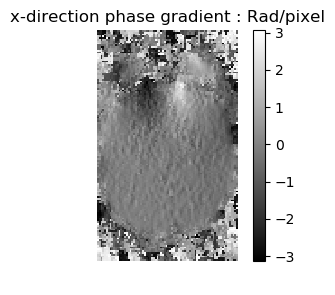

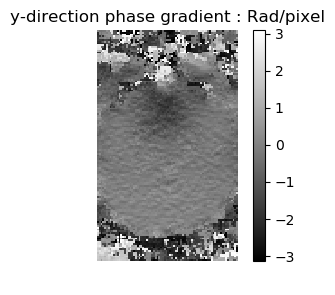

PyObject Text(0.5, 1.0, 'y-direction phase gradient : Rad/pixel')

In [17]:
pxmap = pxmap_checked[:,:,3]; # use the data from patch size = 7 (see our journal paper)
pymap = pymap_checked[:,:,3]; # use the data from patch size = 7 (see our journal paper)
pxmap2a = pxmap.-(datasize1/2);
pymap2a = pymap.-(datasize2/2);
pxmap_radppixel = -pxmap2a*2*π/datasize1;
pymap_radppixel = -pymap2a*2*π/datasize2;
figure(1,figsize=(4,3));imshow(reverse(permutedims(pxmap_radppixel,[2,1]),dims=1),cmap="gray",interpolation="none"); colorbar(); axis("off");title("x-direction phase gradient : Rad/pixel")
figure(2,figsize=(4,3));imshow(reverse(permutedims(pymap_radppixel,[2,1]),dims=1),cmap="gray",interpolation="none"); colorbar(); axis("off");title("y-direction phase gradient : Rad/pixel")


___

# Section 2:  Phase unwrapping that integrates Prelude and Fourier-space data processing (see section 1) 
* 2018 11 29 for julia 1.0

### Loading Prelude-unwrapped phase images

In [18]:
fn4 = string("subjectID25/prelude_SNR2.nii.gz");
headerinfo4 = load_niigz_header(fn4); 
preludephasemap_all = load_niigz_data(fn4, headerinfo4);

### Choosing a single slice for data processing and display

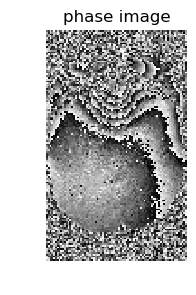

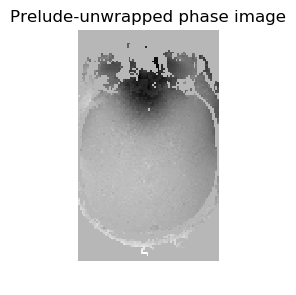

PyObject Text(0.5, 1.0, 'Prelude-unwrapped phase image')

In [19]:
preludephasemap = preludephasemap_all[:,:,ChooseThisSlice];
figure(1,figsize=(3,3));imshow(reverse(permutedims(angle.(imgsn),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("phase image")
figure(2,figsize=(3,3));imshow(reverse(permutedims(preludephasemap,[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("Prelude-unwrapped phase image")

### Extrapolating the Prelude-unwrapped phase map

In [20]:
function gradient(array1)
    a = array1[:];
    array2 = vcat(diff(a)[1],(diff(a)[1:end-1] + diff(a)[2:end])/2.,diff(a)[end])
    return array2
end

gradient (generic function with 1 method)

In [21]:
function findn2d(array2d)
    if ndims(array2d) ==2
        v1 = findall(array2d.!=0)
        v1len = length(v1)
        if v1len >0
            vx = zeros(Int16,v1len);
            vy = zeros(Int16,v1len);
            for cnt = 1:v1len
                vx[cnt] = v1[cnt][1];
                vy[cnt] = v1[cnt][2];
            end
        else
            vx = []
            vy = []
        end
    else
        println("input should be 2D array")
    end
    return vx,vy
end
        

findn2d (generic function with 1 method)

In [22]:
function closest_point_estimation(fieldmap,mask)
    sizex,sizey = size(fieldmap);
    fieldmap0 = fieldmap.*mask;
    gx = zeros(sizex,sizey);
    gy = zeros(sizex,sizey);
    for cnty = 1:sizey
    tmp = gradient(mask[:,cnty]);
    gx[:,cnty] = tmp;
    end
    for cntx = 1:sizex
    tmp = gradient(mask[cntx,:]);
    gy[cntx,:] = tmp;
    end
    gx = abs.(gx);
    gy = abs.(gy);
    gxgy = gx+ gy;
    gxgy[L].=0;
    mask1e = ones(sizex,sizey);
    LL = findall(gxgy.==0);
    mask1e[LL].=0;
    mask1e[1,:].=0;
    mask1e[end,:].=0;
    mask1e[:,1].=0;
    mask1e[:,end].=0;
    mask1eindex_x,mask1eindex_y = findn2d(mask1e); 
    mask1eL = length(mask1eindex_x);
    fieldmap1ext = copy(fieldmap);
    for cnty = 1: sizey 
        for cntx = 1: sizex
            if (mask[cntx,cnty] == 0)
                distance = (mask1eindex_x.-cntx).^2 + (mask1eindex_y.-cnty).^2;
                distance_minindex = findall(distance .== minimum(distance[:]));
                distance_minindex = distance_minindex[1];
                targetx = mask1eindex_x[distance_minindex];
                targety = mask1eindex_y[distance_minindex];
                fieldmap1ext[cntx,cnty] = fieldmap0[targetx,targety];
            end
        end
    end
    return fieldmap1ext
end


closest_point_estimation (generic function with 1 method)

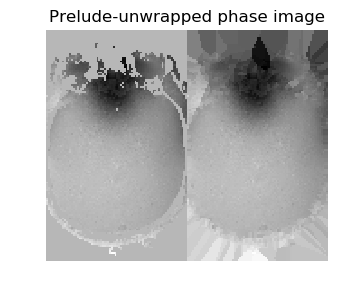

PyObject Text(0.5, 1.0, 'Prelude-unwrapped phase image')

In [23]:
mask = ones(datasize1,datasize2);
L = findall(preludephasemap.==0);
mask[L].=0;
preludephasemap_cpe = closest_point_estimation(preludephasemap,mask);
figure(2,figsize=(6,3));imshow(reverse(permutedims(vcat(preludephasemap,preludephasemap_cpe),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("Prelude-unwrapped phase image")

### Choosing an ROI for 2D numerical integration
* Note that the Prelude-unwrapped phase map has residual error in a brain region with low signal-to-noise ratio and strong susceptibility field gradients
* Phase values within that critical brain region will be computed from Fourier-based phase gradient maps, using the Prelude-unwrapped map as the boundary condition
* The critical brain region can be automatically selected, as described in our journal paper. Here we manually choose a rectangular ROI (x=27:50; y=90:105) to demonstrate the new phase unwrapping procedure

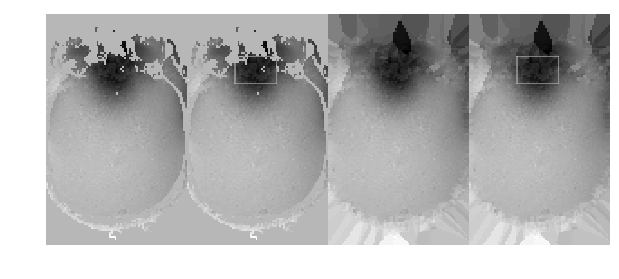

In [24]:
roiStartX = 27
roiEndX = 50
roiStartY = 90
roiEndY = 105
test = copy(preludephasemap);
test[roiStartX,roiStartY:roiEndY]=test[roiStartX,roiStartY:roiEndY]*0.4;
test[roiEndX,roiStartY:roiEndY]=test[roiEndX,roiStartY:roiEndY]*0.4;
test[roiStartX:roiEndX,roiEndY]=test[roiStartX:roiEndX,roiEndY]*0.4;
test[roiStartX:roiEndX,roiStartY]=test[roiStartX:roiEndX,roiStartY]*0.4;
test2 = copy(preludephasemap_cpe);
test2[roiStartX,roiStartY:roiEndY]=test2[roiStartX,roiStartY:roiEndY]*0.4;
test2[roiEndX,roiStartY:roiEndY]=test2[roiEndX,roiStartY:roiEndY]*0.4;
test2[roiStartX:roiEndX,roiEndY]=test2[roiStartX:roiEndX,roiEndY]*0.4;
test2[roiStartX:roiEndX,roiStartY]=test2[roiStartX:roiEndX,roiStartY]*0.4;
figure(1,figsize=(12,3));imshow(reverse(permutedims(vcat(preludephasemap, test,preludephasemap_cpe,test2),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off");


### 2D numerical integration

In [25]:
function encodingMatrixA(xdim::Int64,ydim::Int64)
    gxEncoding = zeros(xdim,xdim*ydim);
    gxEncoding[1,1] = -1;
    gxEncoding[1,2] = 1;
    for cnt = 2:xdim-1
        cntLeft =  cnt-1;
        cntRight = cnt+1;
        gxEncoding[cnt,cntLeft] = -0.5;
        gxEncoding[cnt,cntRight]  = 0.5;
    end
    gxEncoding[xdim,xdim-1] = -1;
    gxEncoding[xdim,xdim] = 1;
    gxEncoding = repeat(gxEncoding,outer=(ydim,1));
    for cnt = 2:ydim
        tmp = gxEncoding[(cnt-1)*xdim+1:cnt*xdim,:];
        tmp = circshift(tmp,(0,(cnt-1)*xdim));
        gxEncoding[(cnt-1)*xdim+1:cnt*xdim,:] = tmp;
    end
    gyEncoding = zeros(xdim*ydim,xdim*ydim);
    for cnt = 1:xdim
        gyEncoding[cnt,cnt] = -1;
        gyEncoding[cnt,cnt+xdim] = 1;
    end
    for cnty = 2:ydim-1
        for cntx = 1:xdim
            cntLeft =  (cnty-2)*xdim+cntx;
            cntRight = cntLeft+(2*xdim);
            gyEncoding[(cnty-1)*xdim+(cntx),cntLeft] = -0.5;
            gyEncoding[(cnty-1)*xdim+(cntx),cntRight]  = 0.5;
        end
    end

    for cntx = 1:xdim
        cntLeft =  (ydim-2)*xdim+cntx;
        cntRight = cntLeft+(1*xdim);
        gyEncoding[(ydim-1)*xdim+(cntx),cntLeft] = -1;
        gyEncoding[(ydim-1)*xdim+(cntx),cntRight]  = 1;
    end
    return (gxEncoding,gyEncoding)
end

encodingMatrixA (generic function with 1 method)

In [26]:
xdim = roiEndX-roiStartX+1;
ydim = roiEndY-roiStartY+1;
(gxE,gyE) = encodingMatrixA(xdim,ydim);
regularizationMask = zeros(xdim,ydim);
regularizationMask[:,1].=1; # boundary condition
regularizationMask[:,end].=1; # boundary condition
regularizationMask[1,:].=1; # boundary condition
regularizationMask[end,:].=1; # boundary condition
L = findall(regularizationMask[:].!=0);
LL = length(L);
regularizationEncoding = zeros(xdim*ydim,xdim*ydim);
for cnt = 1:LL
    regularizationEncoding[L[cnt],L[cnt]]=1;
end

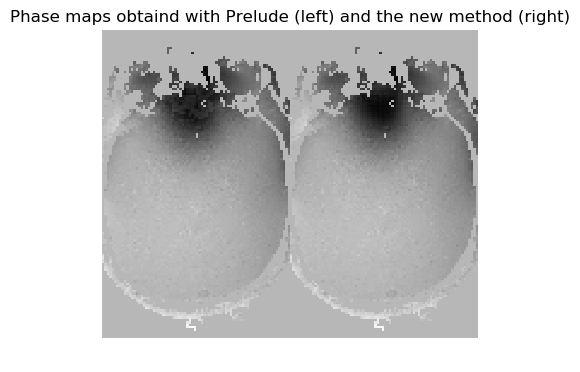

PyObject Text(0.5, 1.0, 'Phase maps obtaind with Prelude (left) and the new method (right)')

In [27]:
test1 = preludephasemap_cpe[roiStartX:roiEndX,roiStartY:roiEndY];

test11 = test1[:];
regularizationValues = zeros(xdim*ydim);
regularizationValues[L] = test11[L];
λ = 1;
gx = pxmap_radppixel[roiStartX:roiEndX,roiStartY:roiEndY]*1;
gy = pymap_radppixel[roiStartX:roiEndX,roiStartY:roiEndY]*1; 
encodingMatrix = vcat(gxE,gyE,regularizationEncoding*λ);
measuredMatrix = vcat(gx[:],gy[:],regularizationValues*λ);
reconMatrix = reshape(encodingMatrix\measuredMatrix,xdim,ydim); # This is the answer: phase values in the chosen ROI
newPhaseMap = deepcopy(preludephasemap_cpe);
newPhaseMap[roiStartX:roiEndX,roiStartY:roiEndY]= reconMatrix;
newPhaseMapMask = newPhaseMap.*mask;

figure(1,figsize=(8,4));imshow(reverse(permutedims(vcat(preludephasemap,newPhaseMapMask),[2,1]),dims=1),cmap="gray",interpolation="none"); axis("off"); title("Phase maps obtaind with Prelude (left) and the new method (right)")